# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.25$ and a fixed random state = $10$.
2. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $6$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 
3. Comment on the interpretability of decision trees.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings("ignore")

In [2]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
        


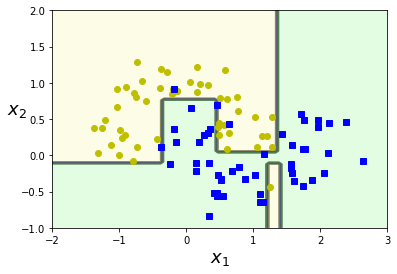

In [3]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
data = make_moons(n_samples= 100, noise= 0.25, random_state = 53)
X = data[0]
Y = data[1]
tree = DecisionTreeClassifier(max_depth= 6,random_state= 10)
tree.fit(X,Y)
# ploting
plot_decision_boundary(tree,X,Y,axes=[-2,3,-1,2])

## Interpretability
- The decision trees provide a clear decision boundary.
- For the above tree, it classifies the points
    - whose x2 > 0 and x1< -0.25 as class yellow 
    - whose x2 > 0.75 and -0.25 < x1 < 0.25 as class yellow
    - whose x2 > 0 and 0.25 < x1 < 1.2 as class yellow
    - others as class blue

### Overfitting in decision tree classifiers

1. Fit another decision tree classifier on the dataset used above, with no restrictions on the model hyperparameters. Plot the decision boundaries and comment on your observations regarding the overfitting tendency of decision tree classifiers.
2. List and explain in a line or two some of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
3. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit in (1). Which model ($1$ vs $3$) do you think will generalize better to the test dataset? 

Part - 1


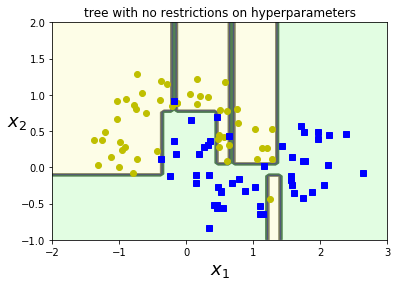

Part - 3


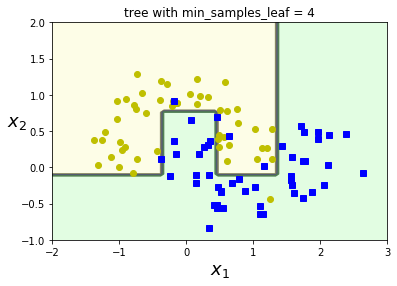

Model 3 generalizes the test dataset better than model 1


In [4]:
# part 1
# another decision tree
tree2 = DecisionTreeClassifier()
tree2.fit(X,Y)
print("Part - 1")
# plotting
plot_decision_boundary(tree2,X,Y,axes=[-2,3,-1,2])
plt.title("tree with no restrictions on hyperparameters")
plt.show()

# part 3
# setting min_sample_leaf to 4
tree3 = DecisionTreeClassifier(min_samples_leaf= 4)
tree3.fit(X,Y)
print("Part - 3")
# plotting
plot_decision_boundary(tree3,X,Y,axes=[-2,3,-1,2])
plt.title("tree with min_samples_leaf = 4")
plt.show()

# comments
print("Model 3 generalizes the test dataset better than model 1")

## 1. Comments
- Here overfitting has occurred when we didn't impose any restrictions on the model hyperparameters.

## 2. Regularizing hyperparameters
### 1. maximum depth of the tree 
    - controling the maximum depth of the tree by purning it generalizes the tree more, there by doesnot overfit
### 2. minimum size of the parent node or (leaf node)
    - This helps in reducing the effect of outliers, thereby avoids overfitting.

## 3.
- Model 3 generalizes the test dataset better than model 1

### Instability of decision trees

1. Generate 100 points ($[x1, x2]$) in the 2D plane using np.random.rand() for $(-0.5)<x1<0.5$ and $(-0.5)<x2<0.5$ .  
2. Assign a label of $1$ to all points having $x1>0.0$ and $0$ otherwise. The dataset can now be easily classified using a straight line parallel to the $x2$ axis. 
3. Fit a decision tree classifier on the above obtained dataset ($D1$) and plot the decision boundary.
4. Now rotate the dataset by $45^{\circ}$in the $[x1,x2]$ plane by suitably multiplying the $100$ points by a rotation matrix.
5. Fit a decision tree classifier on the above obtained dataset ($D2$) and plot the decision boundary.
6. The two datasets obtained above are essentially rotated versions of each other. Comment on the changed decision boundaries of the fit decision trees. Although both the decision trees fit the training datset (D1 and D2) perfectly, which decision tree do you think will generalize better on the test dataset?
7. Conclude about the sensitivity of decision trees to rotation of training data and give reasons for the same.
8. Mention one technique that can result in a better orientation of the training dataset.

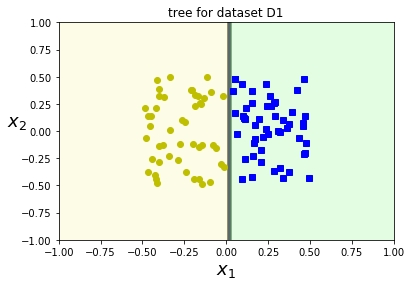

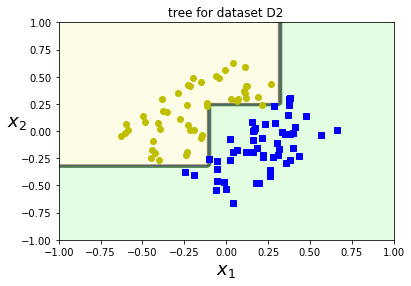

In [5]:
# 1. Generating data
X = np.random.rand(100,2) - 0.5
# 2. labelling the data
Y = np.zeros(100)
for i in range(100):
    if(X[i,0] > 0.0):
        Y[i] = 1
# 3. fitting decision tree
clf = DecisionTreeClassifier()
clf.fit(X,Y)
# plotting
plot_decision_boundary(clf,X,Y,axes=[-1,1,-1,1])
plt.title("tree for dataset D1")
plt.show()

# 4. rotating the dataset
rot_mat = 1/(2)**0.5*np.array([[1, -1],[1, 1]])
X_tr = np.dot(X,rot_mat)

# 5. fitting decision tree
clf1 = DecisionTreeClassifier()
clf1.fit(X_tr,Y)
# plotting
plot_decision_boundary(clf1,X_tr,Y,axes=[-1,1,-1,1])
plt.title("tree for dataset D2")
plt.show()

### 6. 

- The boundary should have been just rotated by 45 degrees, but this didn't happen on D2, because the decision tree takes into account a single feature at a time(orthogonal to the axis) to decide on the split criteria. So we get a staircase sort of boundary for dataset (D2).
- The boundary of dataset D1 generalizes better.

### 7. 
- Decision trees are very sensitive about rotations of the training data, this is because we use only one feature at a time for deciding on the spliting of a node, i.e. it takes into account of the orthogonality of features when splitting the nodes.(all decision boundary splits are perpendicular to the input axes.)

### 8.
- Reorienting the data matrix and then fitting a tree would work well.
- We can perform LDA on the dataset and then fit the tree.

### Linear classifiers vs decision tree classifiers

1. Taking into account the fact that all decision boundary splits are perpendicular to the input axes, give an example of a dataset where : <br>
a. The linear classifier outperforms the decision tree classifier <br> 
b. The decision tree classifier outperforms the linear classifier <br>
For ease of visualizing, your datasets can contain 2D points having two labels : $0$ and $1$. Plot the points such that all points having the same label are of the same colour.


Decision tree classifier


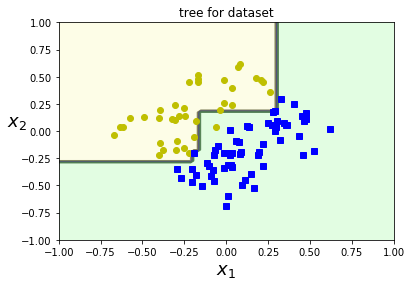

Linear classifier


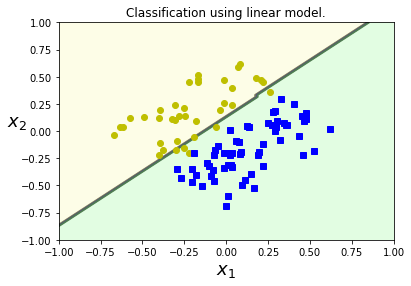

In the above example Linear classifier outperforms decision tree.
Decision tree classifier


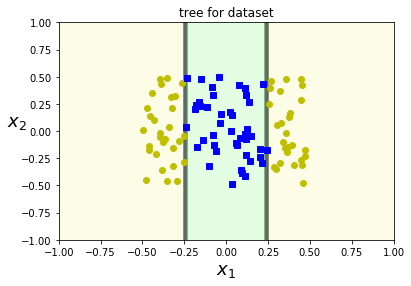

Linear classifier


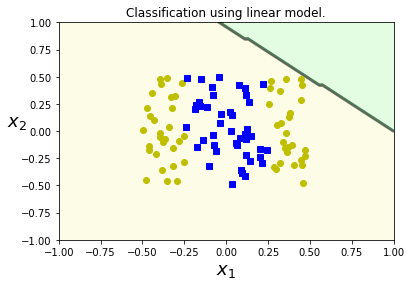

In the above example decision tree outperforms Linear classifier.


In [14]:
## part a === linear classifier out performs decision tree
X = np.random.rand(100,2) - 0.5
Y = np.zeros(100)
for i in range(100):
    if(X[i,0] > 0.0):
        Y[i] = 1

# rotating the dataset(45 degree)
rot_mat = 1/(2)**0.5*np.array([[1, -1],[1, 1]])
X_tr = np.dot(X,rot_mat)

# fitting decision tree
clf1 = DecisionTreeClassifier()
clf1.fit(X_tr,Y)
# plotting
print("Decision tree classifier")
plot_decision_boundary(clf1,X_tr,Y,axes=[-1,1,-1,1])
plt.title("tree for dataset")
plt.show()

# fitting a linear classifier
print("Linear classifier")

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_tr,Y)
plot_decision_boundary(LR,X_tr,Y,axes=[-1,1,-1,1])
plt.title("Classification using linear model.")
plt.show()

print("In the above example Linear classifier outperforms decision tree.")

######========== Decision tree out performs linear classifier.
X = np.random.rand(100,2) - 0.5
Y = np.zeros(100)
for i in range(100):
    if(X[i,0] > -0.25 and X[i,0] < 0.25):
        Y[i] = 1  # if -0.25 < X < 0.25

# fitting decision tree
clf1 = DecisionTreeClassifier(min_samples_leaf = 10)
clf1.fit(X,Y)
# plotting
print("Decision tree classifier")
plot_decision_boundary(clf1,X,Y,axes=[-1,1,-1,1])
plt.title("tree for dataset")
plt.show()

# fitting a linear classifier
print("Linear classifier")

LR = LogisticRegression()
LR.fit(X,Y)
plot_decision_boundary(LR,X,Y,axes=[-1,1,-1,1])
plt.title("Classification using linear model.")
plt.show()

print("In the above example decision tree outperforms Linear classifier.")

### Regression using decision trees

1. Train a regression tree on the noisy quadratic dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

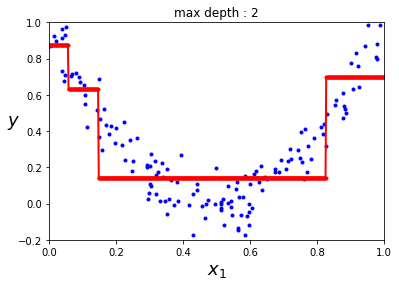

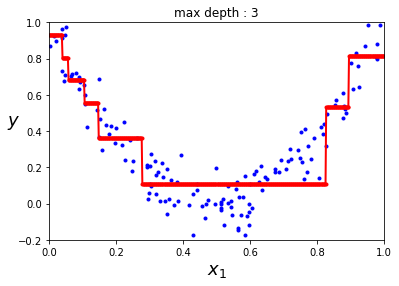

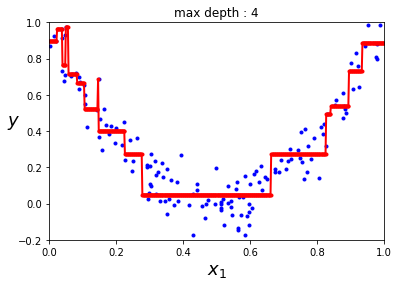

In [7]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Quadratic + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(150, 1) / 10

# fitting a regression tree
from sklearn.tree import DecisionTreeRegressor
tree_depth = [2,3,4]
for depth in tree_depth:
    tree = DecisionTreeRegressor(max_depth= depth)
    # fitting
    tree.fit(X,y)
    # ploting
    plt.figure()
    plot_regression_predictions(tree, X,y)
    plt.title("max depth : "+str(depth))
    plt.show()
    

### Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 
3. Now fit a regression tree on the same dataset using the min_samples_leaf hyperparameter set to $10$. Plot the predicted value in all input space divisions and compare with the model fit in (1). Which model ($1$ vs $3$) do you think will generalize better to the test dataset? 

part - 1


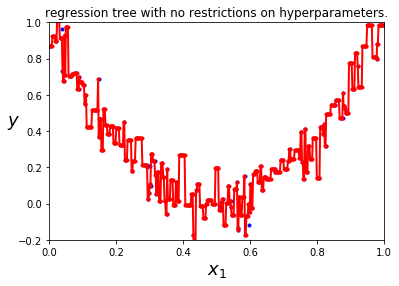

part - 3


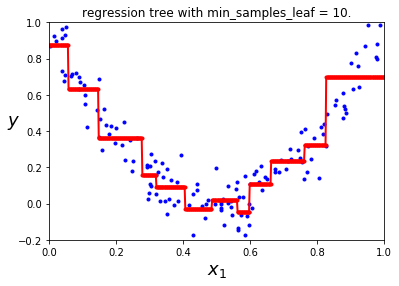

Model 3 generalizes better than model 1.


In [8]:
print("part - 1")
tree = DecisionTreeRegressor()
# fitting
tree.fit(X,y)
# ploting
plt.figure()
plot_regression_predictions(tree, X,y)
plt.title("regression tree with no restrictions on hyperparameters.")
plt.show()

print("part - 3")
tree1 = DecisionTreeRegressor(min_samples_leaf = 10)
# fitting
tree1.fit(X,y)
# ploting
plt.figure()
plot_regression_predictions(tree1, X,y)
plt.title("regression tree with min_samples_leaf = 10.")
plt.show()

# comments
print("Model 3 generalizes better than model 1.")

## 2.
- Yes, the decision trees have too much tendency to overfit if no regularization is applied.

## 3.
- Model 3 generalizes better than Model 1.

### Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.4$). 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $30$ for max_leaf_nodes and $2$ to $6$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [20]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report


# 1. Generating data
X_data,Y_data = make_moons(n_samples = 10000, noise = 0.4)

# 2. spliting the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size = 0.25)

# 3. using GridSearchCV
parameters = {'max_leaf_nodes':np.arange(2,31),'min_samples_split':[2,3,4,5,6]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters, cv = 5)
clf.fit(X_train,Y_train)
print("Best hyperparameters :")
print(clf.best_params_)

# 4. Training and testing
print("\nTraining the model using the best parameters obtained\n")
best_params = clf.best_params_
final_tree = DecisionTreeClassifier(max_leaf_nodes = best_params['max_leaf_nodes'], min_samples_split = best_params['min_samples_split'])
final_tree.fit(X_train,Y_train)
# prediction 
Y_pred = final_tree.predict(X_test)

# model performance
print("Accuracy :",accuracy_score(Y_pred,Y_test))
print("Classification Report :")
print(classification_report(Y_pred,Y_test))
print("Confusion matrix :")
print(confusion_matrix(Y_pred,Y_test))


Best hyperparameters :
{'max_leaf_nodes': 15, 'min_samples_split': 2}

Training the model using the best parameters obtained

Accuracy : 0.8616
Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1215
           1       0.87      0.86      0.86      1285

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500

Confusion matrix :
[[1052  163]
 [ 183 1102]]


### Growing a random forest classifier

1. Continuing the previous exercise, generate $1,000$ subsets of the training set, each containing 100 instances selected randomly. You can use sklearn.model_selection.ShuffleSplit for this. Contrary to other cross-validation strategies, random splits in ShuffleSplit do not guarantee that all folds will be different.
2. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set created in ($2$) of the previous problem. How do you expect these decision trees to perform as compared to the first decision tree? Give reasons. Report the mean of accuracy scores of the 1000 trees.
3. For each test set instance, generate the predictions of the $1,000$ Decision Trees, and keep only the most frequent prediction. This gives you majority-vote predictions over the test set.
4. Evaluate these predictions on the test set and report the change in accuracy change as compared to that of the single decision tree.  

In [36]:
from sklearn.model_selection import ShuffleSplit
# part 1
rs = ShuffleSplit(n_splits = 1000, train_size = 100)

# part 2
print("part 2")
Y_pred_trees = []

ind = rs.split(X_train)
for tr_ind in ind:
    X_tr = X_train[tr_ind[0]]
    Y_tr = Y_train[tr_ind[0]]
    # fitting the tree classifier
    clf = DecisionTreeClassifier(max_leaf_nodes = 15,min_samples_split = 2)
    clf.fit(X_tr,Y_tr)
    Y_pred = clf.predict(X_test)
    Y_pred_trees.append(Y_pred)

Y_pred_trees = np.array(Y_pred_trees)

avg_accuracy = np.count_nonzero((Y_pred_trees-Y_test) == 0)/1000/len(Y_test)
print("Mean Accuracy scores of 1000 trees :",avg_accuracy)

part 2
Mean Accuracy scores of 1000 trees : 0.8005452000000001


## Comments
- Since the size of the training data is very less for each decision tree, it may result in overfitting or underfitting in some cases, Hence, it wouldn't perform well.

In [44]:
# part 3
# for majority system
temp = np.mean(Y_pred_trees,axis = 0)
Y_pred_majority = np.round(temp)
Y_pred_majority = np.array(Y_pred_majority,dtype = int)
# part 4
print("Accuracy score for majority voting :",accuracy_score(Y_pred_majority, Y_test))

Accuracy score for majority voting : 0.856


## Comments
- The majority voting reduces the variance among the predictors,thereby reduces overfitting.
- Hence it generalizes better than the first decision tree.